In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Example on Synthetic Network</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
kind = "BAH"                    # network generative model type
N = 2000                        # number of nodes
m = 4                           # minimun degree (proxy of density)
H = 0.6                         # homophily
B = 0.5                         # class balance (minority fraction)
sampling = "nodes"              # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
pseeds = 0.2                    # fraction of nodes to sample 
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
IGNORE = 0                      # IGNORE class value
DATAFN = "../data/USF51.gpickle"   # networkx graph file path
OUTPUT = "../results-individual"   # directory to store results

<h2>1. Network</h2>

In [4]:
net = Network()
net.load(DATAFN, IGNORE)
net.info()

Name: USF51
Type: Graph
Number of nodes: 1705
Number of edges: 15597
Average degree:  18.2956
{'group': ['M', 'm'], 'class': 'gender', 'attributes': ['status', 'gender', 'major', '2major', 'dorm', 'year', 'highschool'], 'labels': [1, 2], 'name': 'USF51', 'ignoreInt': 0, 'min_degree': 1}


<h2>2. Sampling</h2>

In [5]:
sam = Sampling(sampling, net.G, pseeds)
sam.extract_subgraph()
sam.info()

Name: USF51
Type: Graph
Number of nodes: 341
Number of edges: 639
Average degree:   3.7478
{'group': ['M', 'm'], 'class': 'gender', 'attributes': ['status', 'gender', 'major', '2major', 'dorm', 'year', 'highschool'], 'labels': [1, 2], 'name': 'USF51', 'ignoreInt': 0, 'min_degree': 0, 'pseeds': 0.2, 'method': 'nodes'}


<h2>3. Modeling</h2>

In [6]:
local_model = Local(LC)
local_model.learn(sam.Gseeds)
local_model.info()

1    0.603499
2    0.396501
dtype: float64


In [7]:
relational_model = Relational(RC).get_model()
relational_model.learn(sam.Gseeds)
relational_model.info()

          1         2
1  0.555961  0.444039
2  0.793478  0.206522


<h2>4. Inference</h2>

In [8]:
inference = Inference(CI)
inference.predict(net.G, local_model, relational_model)
inference.evaluation()
inference.summary()
inference.save(OUTPUT)

(1, 0, 0, 1, 1)
(1, 1, 0, 1, 1)
(0.6150583362306128, 0.16103247756003003, 0.0012231251400535142, 0.9836742544704382, 0.7296078295090798)

Prediction in 1036.9519550800323 seconds
ROCAUC: 0.7381746668449436
ROCAUC curve: 0.7381746668449436
MAE: 0.3548387096774194
ccm: 0.5288808664259927
ccM: 0.7246913580246913
bias: 0.42189899880539283

USF51/P20_graph.gpickle saved!
USF51/P20_evaluation.pickle saved!


<h2>5. Results</h2>

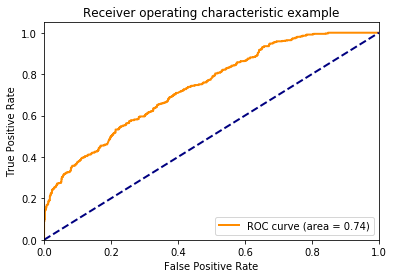

In [9]:
fn = None
viz.plot_rocauc_curve(inference.fpr, inference.tpr, inference.rocauc_curve, fn)